## Расчёт давления изопропанола в ИРС

$$\ln\left(\frac{p}{p_0}\right)=-\frac{\Delta_{vap}H}{R}\left(\frac{1}{T}-\frac{1}{T_0}\right)$$

Справочные данные: (из [NIST](https://webbook.nist.gov/cgi/cbook.cgi?ID=C67630&Mask=4https://webbook.nist.gov/cgi/cbook.cgi?ID=C67630&Mask=4))
$$\Delta_{vap}H^o_{288}=45.7 kJ/mol$$
$$c_{p(298)}=161.2J/mol\cdot K$$

$$\Delta_{vap}H^o_{273}=\Delta_{vap}H^o_{288}-\int_{273}^{288}c_p\,dT$$
$$\Delta_{vap}H^o_{273}=(45700-15\cdot161.2)J/mol=43.3 kJ/mol$$

$$K_p = \frac{p_{ac}\cdot p_{H_2}}{p_{alc}\cdot p^o}= \frac{p_{ac}\cdot\left(p_{ac}+ p^o_{H_2}\right)}{p_{alc}\cdot p^o}$$

$$p^o_{H_2}=0.03bar$$
$$p^o=1bar$$


In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

def line(x, a, b):
    '''
    y = ax + b
    '''
    return a*x+b

In [2]:
#Для определения давления изопропанола
#H_vap = 45700-15*161.2 #J/mol
p = np.array([1, 10, 40, 100, 760]) #mmHg
T = np.array([-26.1, 2.4, 23.8, 39.5, 82.5]) #Celsius
#Convert units of p and T
T = T + 273.15 #K
p = p*0.001333224*10**5 #bar
T_1 = T[0]
p_1 = p[0]

params = linregress(1/T-1/T_1, np.log(p/p_1))

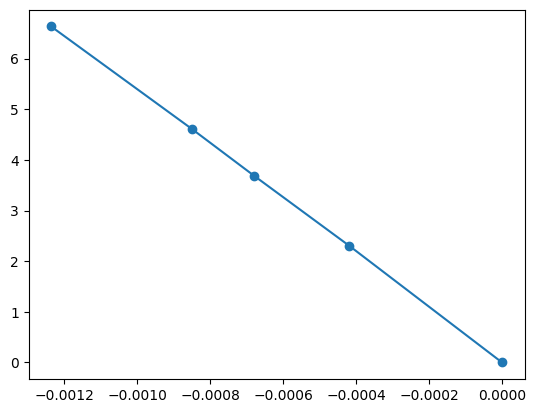

In [3]:
#Linearize
plt.scatter(1/T-1/T_1, np.log(p/p_1))
plt.plot(1/T-1/T_1, np.log(p/p_1))

In [4]:
d_vap_H = params[0]*8.314*(-1)

In [5]:
def p_isopr(T):
    T_1 = np.float64(247.04999999999998)
    p_1 = np.float64(133.32240000000002)
    d_vap_H = np.float64(44614.38747813448)
    R = 8.314
    return np.exp(-d_vap_H/R*(1/T-1/T_1))*p_1

In [6]:
p_isopr(273)/10**5

0.010509605784554604

Промежуточный результат:
- давление изопропанола при $0^oC$ составляет $1050 Pa$ или $1.05 \cdot 10^{-2} bar$
- также знаем, что давление водорода (вроде как) $0.03bar$

In [7]:
T = np.array([140, 150, 160]) #Celsius
T = T + 273
K_p = np.array([0.13, 0.19, 0.28])

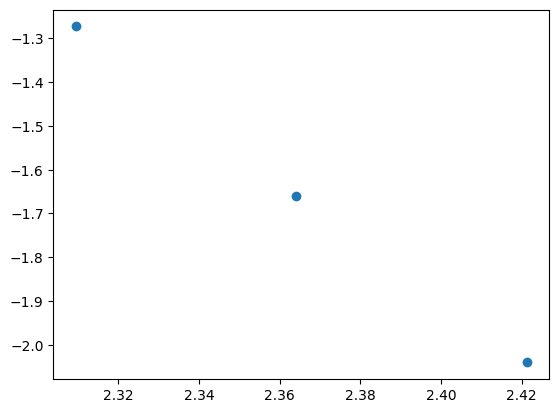

In [8]:
plt.scatter(1000/T, np.log(K_p))

In [9]:
d_r_G = linregress(1000/T, np.log(K_p))[0]*(-8.314)

In [10]:
d_vap_H

44614.38747813448

In [11]:
K_p_res = np.array([ 0.0860, 0.1131, 0.1368]) #экспериментальные

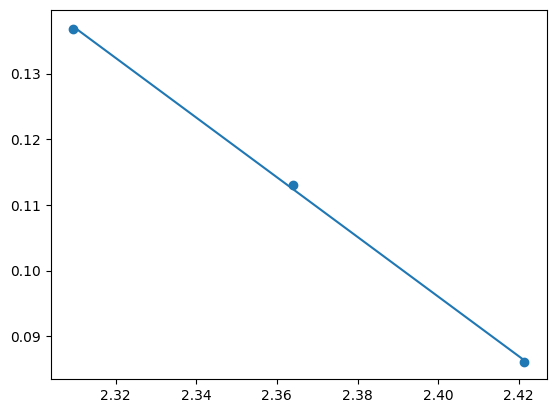

In [12]:
pars = linregress(1000/T, K_p_res)
plt.scatter(1000/T, K_p_res)
x_fine = np.linspace(np.min(1000/T), np.max(1000/T), 100)
plt.plot(x_fine, line(x_fine, pars[0], pars[1]))

In [13]:
linregress(1000/T, np.log(K_p_res))

LinregressResult(slope=-4.155498889608311, intercept=7.620161356685635, rvalue=-0.9959474513384997, pvalue=0.05733317802206699, stderr=0.3752540747535306, intercept_stderr=0.8876215931646128)

In [15]:
linregress(1000/T, -np.log(K_p))

LinregressResult(slope=6.858512762450974, intercept=-14.562050091362654, rvalue=0.9998024880223585, pvalue=0.012653159657890897, stderr=0.13633457507791083, intercept_stderr=0.3224842070364145)